In [1]:
%matplotlib notebook
import pandas as pd
from datetime import date, datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
### Use this cell to split data by a specified date range

###(enter your start date here) data starts on 2020-06-03
###use some lines to keep track of relevant timeframes
###M1 fall term classes start on 2020-08-25 and end on 2020-12-11
### M1 spring term calsses started on 2021-01-05 and end on 2021-04-30

##the next two lines set the date range
start_date = pd.to_datetime('2020-08-25')
end_date = pd.to_datetime('2020-12-11')
#end_date = date.today()

In [3]:
#import data and rename columns

#below is path if pulling from local file
path = os.path.abspath("Med_School_Time_Tracking.csv")

#below is path if pulling directly from Google Sheets URL (as of 12/15/2020, the Google API for Sheets was not working)
#path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTcdP3ne8G2iQ4YBAN-QBPyJkEY7bzHbwprXVEdJhZGDRXLA0nxKiG54CZMcXSR5StFtrKst5x5pKXd/pub?output=csv'
data = pd.read_csv(path)

#read in data and create columns with more easily manipulatable names
data = data.rename(columns = {'Enter date for time entered': 'Date', 
                                  'Class Time':'Class', 'Lab Time':'Lab',
                                  'Anki (as recorded in app)':'Anki',
                                  'Other (Group Study, Committees, Shadowing, etc.)':'Other',
                                  'Self Study (not including Anki)':'Self-Study'})
    
df = pd.DataFrame(data)
df.tail()

,Timestamp,Date,Class,Lab,Anki,Volunteering,Research,Other,Self-Study
203,12/7/2020 20:15:20,12/7/2020,120.0,NaN,110.0,NaN,NaN,NaN,225.0
204,12/8/2020 21:29:49,12/8/2020,NaN,NaN,105.0,NaN,NaN,60.0,315.0
205,12/9/2020 21:06:41,12/9/2020,140.0,NaN,35.0,NaN,NaN,90.0,25.0
206,12/10/2020 18:33:34,12/10/2020,NaN,NaN,30.0,NaN,NaN,295.0,180.0
207,12/11/2020 9:14:35,12/11/2020,70.0,NaN,23.0,NaN,NaN,60.0,NaN


In [4]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

#returns day of week as an integer where Monday is 0 and Sunday is 6
df['Dow'] = df['Date'].dt.weekday

#returns month as an integer where Jan is 1 and Dec is 12
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
#df.tail()

In [5]:
#sets index per start and end date
index = pd.DatetimeIndex(df['Date'])
df = df.set_index(index)
df = df[start_date:end_date]
#df.shape

In [6]:
dayz = len(df)

In [7]:
#turn date into string for graphs
startstr = str(start_date)
endstr = str(end_date)
startstr = startstr[0:10]
endstr = endstr[0:10]
date_rangestr = startstr + ' to ' + endstr
#date_rangestr

In [8]:
# add in sum row
col_list = list(df)
col_list.remove('Dow')
col_list.remove('Month')
col_list.remove('Year')
#col_list.remove('Date')
#col_list

In [9]:
df['Sum'] = df[col_list].sum(axis=1)
#df.tail()

In [10]:
#sort by dow for figure
df_dow = df.groupby(['Dow'])['Sum'].sum().reset_index(name = 'Total').set_index(['Dow'])
df_dow1 = df.groupby(['Dow'])['Sum'].mean().reset_index(name = 'Total').set_index(['Dow'])
#df_dow1.tail()

In [11]:
#These are functions to determine the label of your year in school. 
#You will need to adjust the integers to suit your own school's schedule

def label_term (row):
    if row['Month'] >= 8 and row['Month'] <= 12:
        return "Fall"
    if row['Month'] >= 1 and row['Month'] <= 4:
        return "Spring"
    else:
        return "Summer"


def label_year (row):
    if row['Year'] == 2020 and row['Month'] >=8 or row['Year'] == 2021 and row['Month'] <= 4:
        return "MS1"

df['Term'] = df.apply (lambda row: label_term(row), axis=1)
df['yearLabel'] = df.apply (lambda row: label_year(row), axis=1)
#df.tail()

<IPython.core.display.Javascript object>


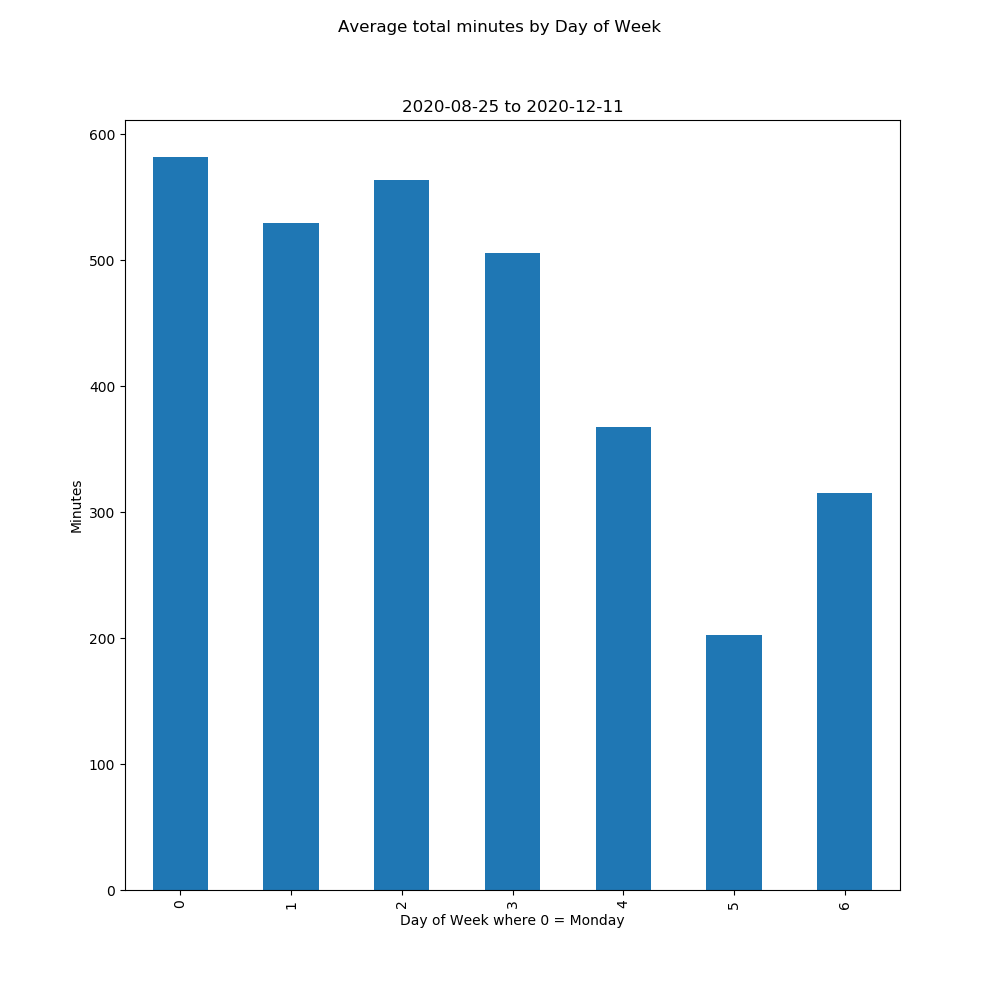

In [12]:
#plot of average total minutes by day of the week
df_dow1.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Average total minutes by Day of Week')
plt.title(date_rangestr)
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Minutes')
plt.savefig('1total_dow.png')

In [13]:
#sum the months for total by month figure
df_month = df.groupby(['Month'])['Sum'].sum().reset_index(name = 'Total').set_index(['Month'])
#convert minutes to hours
df_month['Total'] = df_month['Total']/60
df_month
#average the months so that this script works year over year
df_month1 = df_month.groupby(['Month'])['Total'].mean().reset_index(name = 'Total').set_index(['Month'])
#df_month1.tail()

<IPython.core.display.Javascript object>


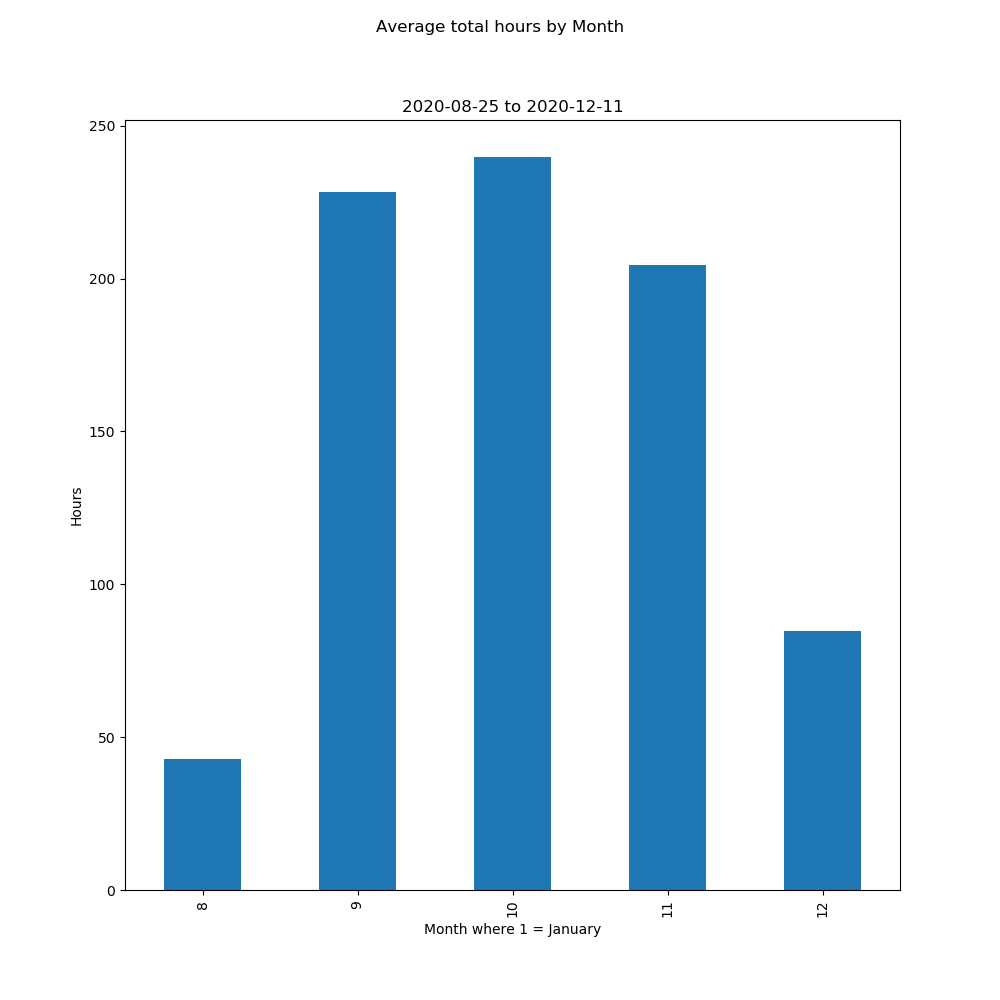

In [14]:
#plot of average total hours by month
df_month1.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Average total hours by Month')
plt.title(date_rangestr)
plt.xlabel('Month where 1 = January')
plt.ylabel('Hours')
plt.savefig('1total_month.png')

In [15]:
#sum the years for total by years figure
df_year = df.groupby(['Year'])['Sum'].sum().reset_index(name = 'Total').set_index(['Year'])
#convert minutes to hours
df_year['Total'] = df_year['Total']/60
#average the years so that this script works year over year
#df_year1 = df_year.groupby(['Year'])['Total'].mean().reset_index(name = 'Total').set_index(['Year'])
#df_year.tail()

<IPython.core.display.Javascript object>


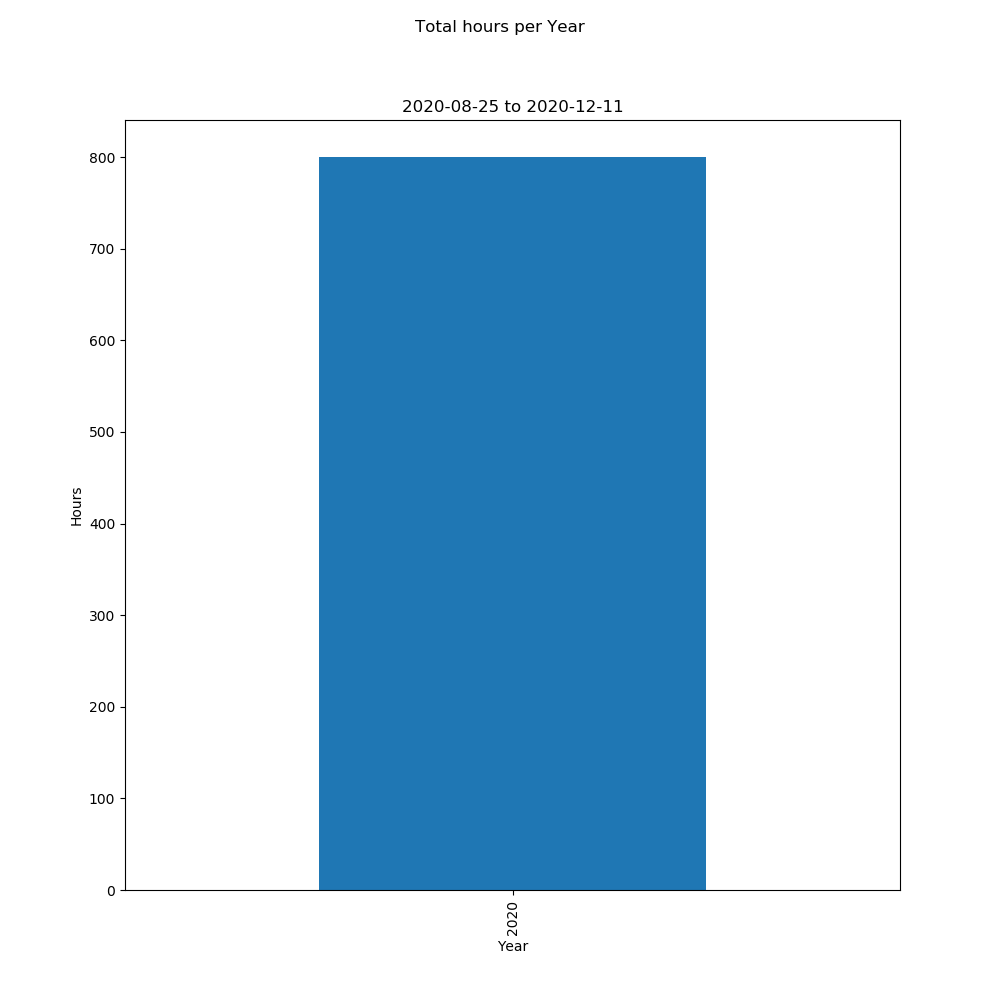

In [16]:
df_year.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Total hours per Year')
plt.title(date_rangestr)
plt.xlabel('Year')
plt.ylabel('Hours')
plt.savefig('1total_year.png')

In [17]:
#create new dataframe with activiies indexed by dow for figure
cat_dow = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],index = ['Dow'])
cat_dow1 = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],index = ['Dow'],
                          aggfunc='sum')
#cat_dow1

<IPython.core.display.Javascript object>


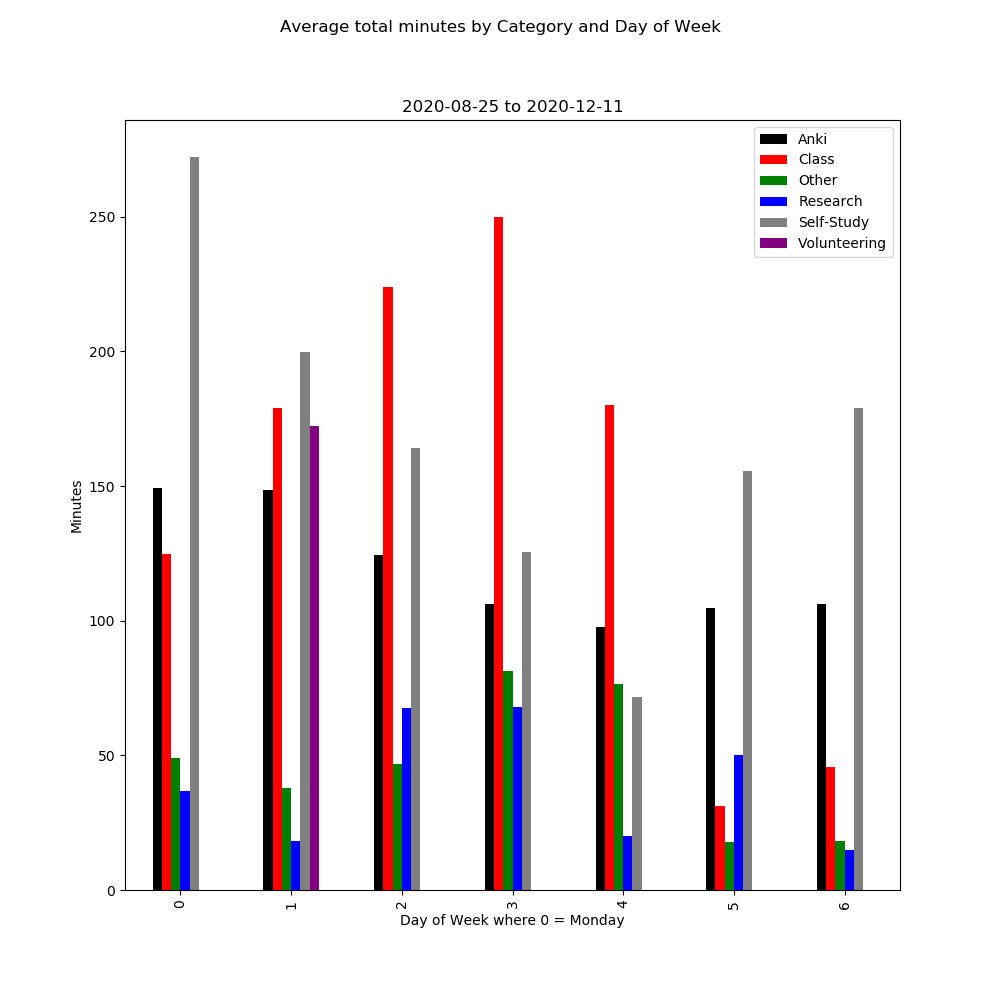

In [18]:
cat_dow.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'],figsize = (10,10))
plt.suptitle('Average total minutes by Category and Day of Week')
plt.title(date_rangestr)
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Minutes')
plt.legend(loc = 'best')
plt.savefig('1cat_dow.png')

In [19]:
#create new dataframe with activiies indexed by month for figure
cat_month1 = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other','Sum'],
                           index = ['Month'], aggfunc='sum')
cat_month = cat_month1.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Month'])
#convert minutes to hours
cat_month['Anki'] = cat_month['Anki']/60
cat_month['Class'] = cat_month['Class']/60
cat_month['Lab'] = cat_month['Lab']/60
cat_month['Research'] = cat_month['Research']/60
cat_month['Self-Study'] = cat_month['Self-Study']/60
cat_month['Volunteering'] = cat_month['Volunteering']/60
cat_month['Other'] = cat_month['Other']/60
#cat_month

<IPython.core.display.Javascript object>


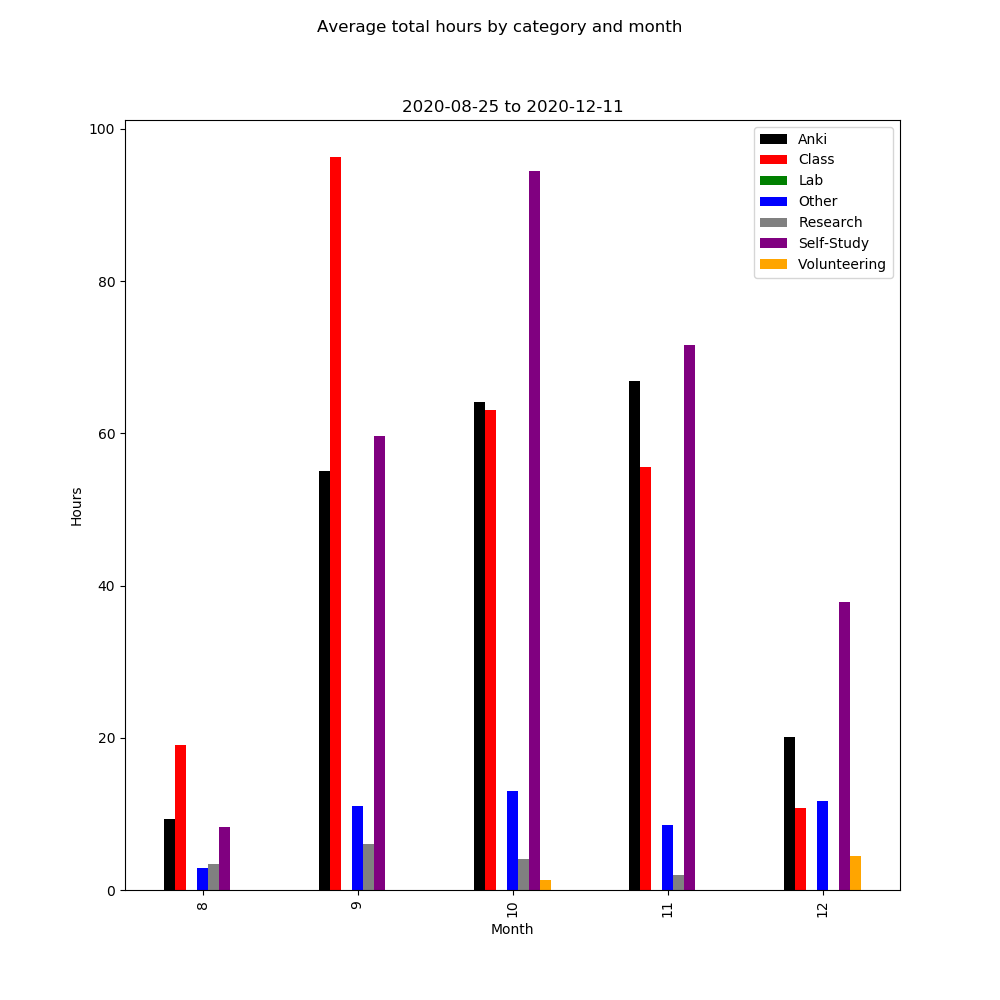

In [20]:
cat_month.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'],figsize = (10,10))
plt.suptitle('Average total hours by category and month')
plt.title(date_rangestr)
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend(loc = 'best')
plt.savefig('1cat_month.png')

In [21]:
#create new dataframe with activiies indexed by year for figure
cat_year1 = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other','Sum'],
                           index = ['Year'], aggfunc='sum')
cat_year = cat_year1.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Year'])
#convert minutes to hours
cat_year['Anki'] = cat_year['Anki']/60
cat_year['Class'] = cat_year['Class']/60
cat_year['Lab'] = cat_year['Lab']/60
cat_year['Research'] = cat_year['Research']/60
cat_year['Self-Study'] = cat_year['Self-Study']/60
cat_year['Volunteering'] = cat_year['Volunteering']/60
cat_year['Other'] = cat_year['Other']/60
#cat_year

<IPython.core.display.Javascript object>


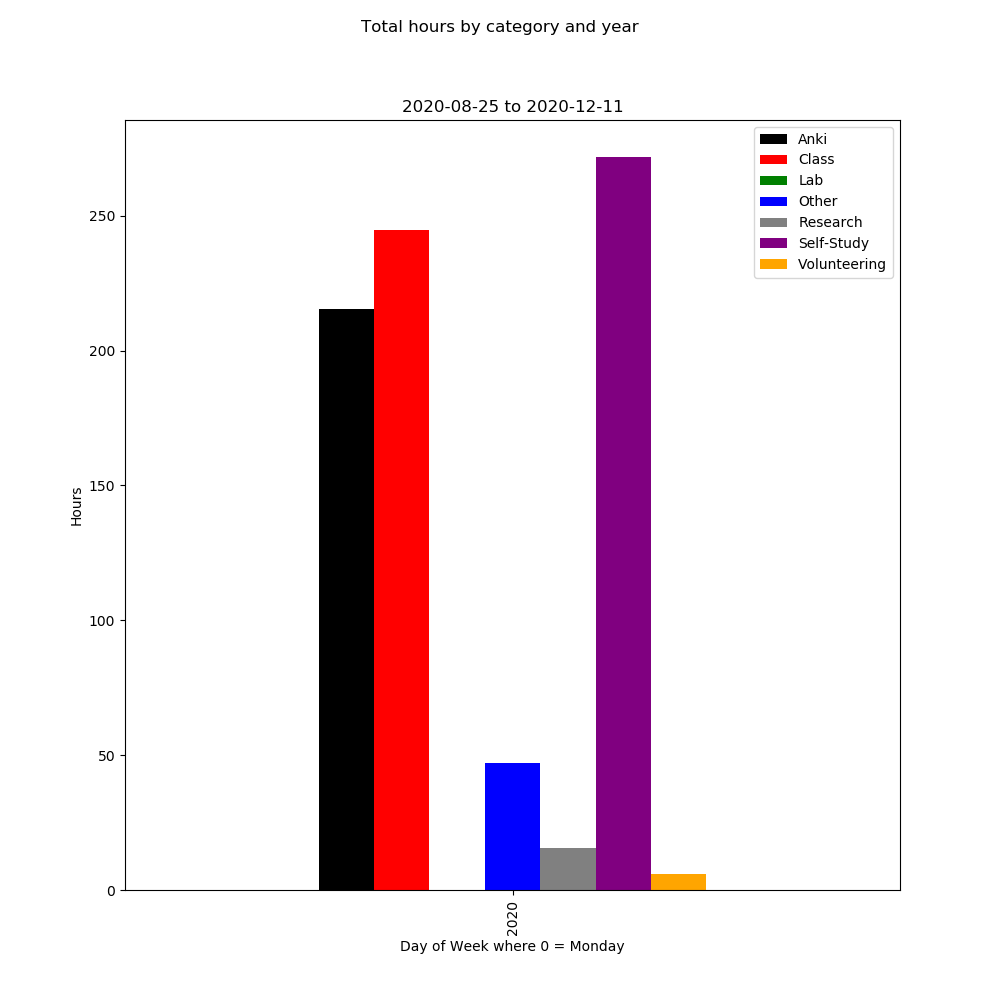

In [22]:
cat_year.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'],figsize = (10,10))
plt.suptitle('Total hours by category and year')
plt.title(date_rangestr)
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Hours')
plt.legend(loc = 'best')
plt.savefig('1cat_year.png')

In [23]:
#df.tail()

In [24]:
#create new dataframe for time by date
df.rename(columns = {'Date':'d'}, inplace = True)
x = df['d'].dt.strftime('%x')
df_date = df.pivot_table(['Sum'],index = [x])
#df_date.tail()

<IPython.core.display.Javascript object>


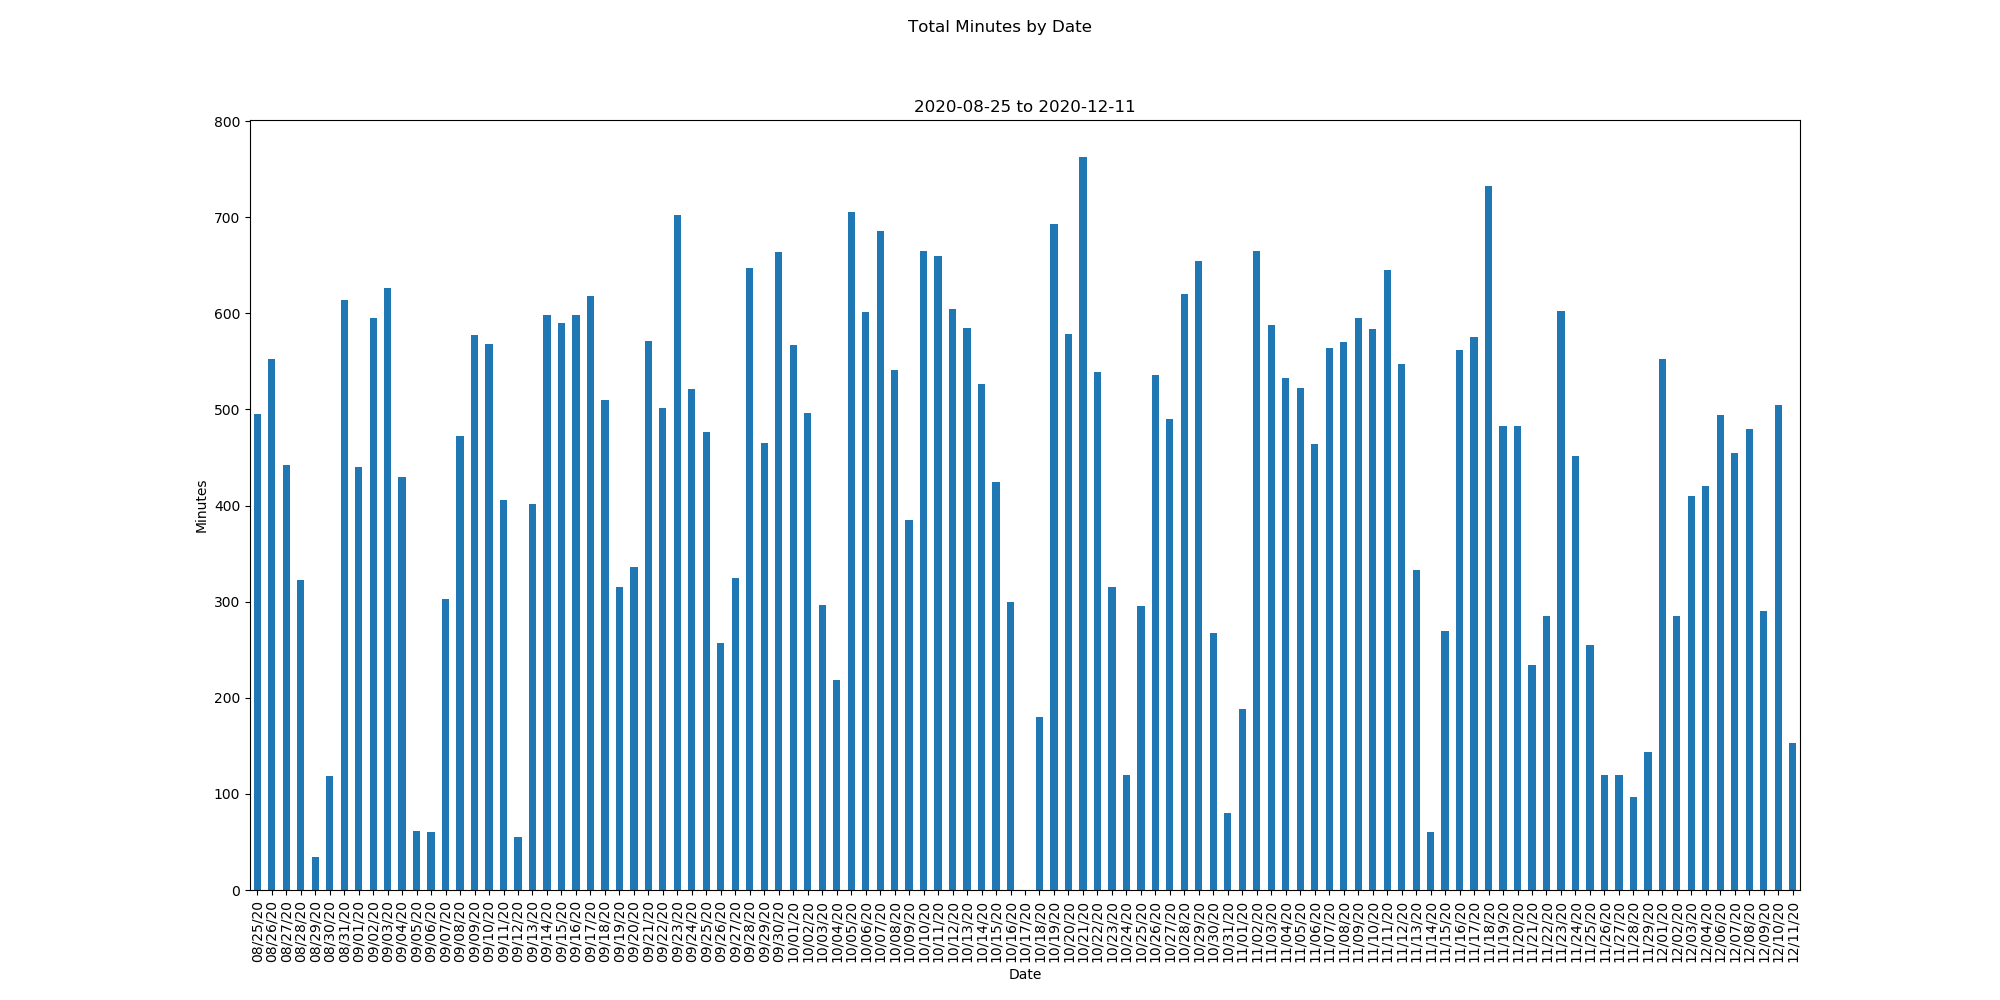

In [25]:
df_date.plot.bar(legend = False, figsize = (20,10))
plt.suptitle('Total Minutes by Date')
plt.title(date_rangestr)
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.savefig('1total_date.png')

In [26]:
#create new df for total minutes by category and date
cat_date = df.pivot_table(['Anki','Class','Lab','Research','Volunteering','Other','Self-Study'], index = x)
#cat_date.tail()


<IPython.core.display.Javascript object>


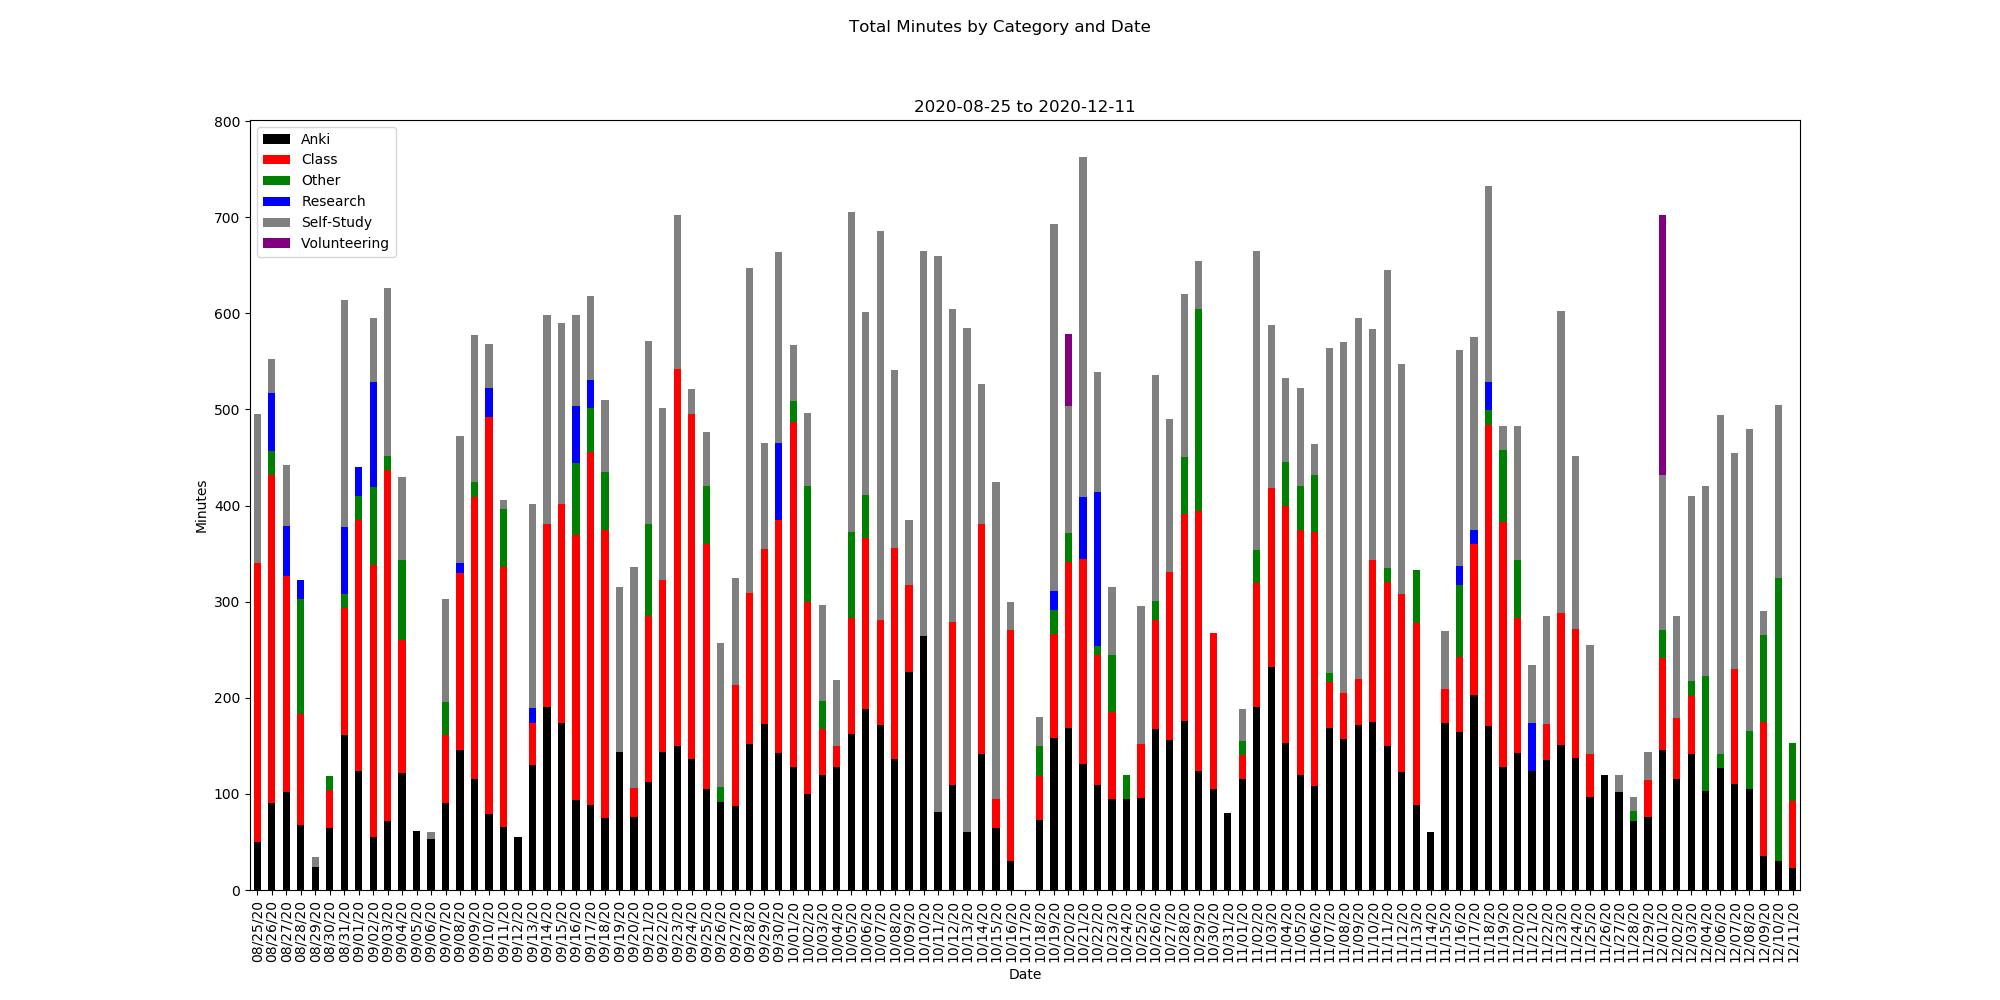

In [27]:
cat_date.plot.bar(stacked = True, figsize = (20,10), color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'])
plt.suptitle('Total Minutes by Category and Date')
plt.title(date_rangestr)
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.savefig('1cat_date.png')

In [28]:
#drop sum from rows to set up for descriptive stats
cat_year1.drop('Sum', axis = 1)
cat_month1 = cat_month1.drop('Sum', axis = 1)


In [29]:
#split data by week for hours per week

df1 = df.reset_index()
df1['Sum'] = df1['Sum'] / 60
y = df1.groupby(df1.d.dt.strftime('%W')).Sum.sum()
df2 = pd.DataFrame(y)
#df2

In [30]:
#account for the number of weeks in time range
row_num = int(len(df2.index))
df2 = df2.reset_index()
df2.drop(['d'], axis = 1)


,Sum
0,32.766667
1,47.100000
2,46.383333
3,59.416667
4,55.900000
5,55.900000
6,70.716667
7,43.683333
8,55.066667
9,47.250000


<IPython.core.display.Javascript object>


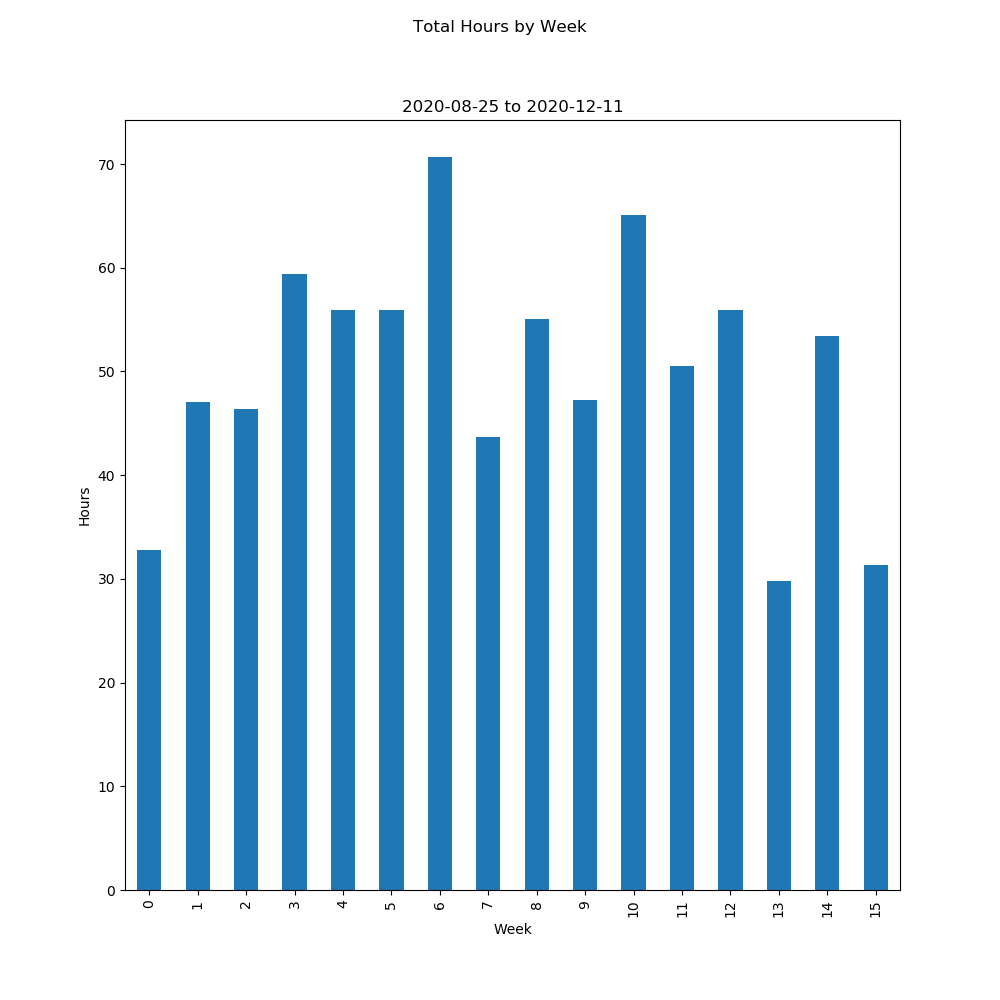

In [31]:
#plot for total hours by week
df2.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Total Hours by Week')
plt.title(date_rangestr)
plt.xlabel('Week')
plt.ylabel('Hours')
plt.savefig('1week_sum.png')

In [32]:
#sum the year label column for total by year label figure
df_label = df.groupby(['yearLabel'])['Sum'].sum().reset_index(name = 'Total').set_index(['yearLabel'])
#convert minutes to hours
df_label['Total'] = df_label['Total']/60
df_label.tail()


,Total
yearLabel,
MS1,800.416667


<IPython.core.display.Javascript object>


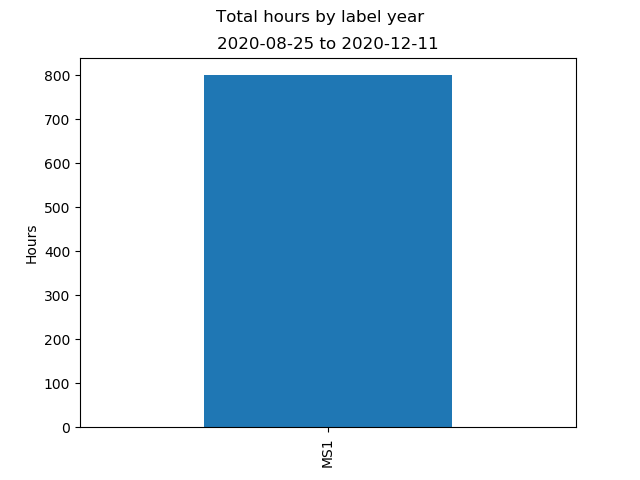

In [33]:
#plot for total hours by label year (can be configured in cell # 11)
df_label.plot.bar(legend = False)
plt.suptitle('Total hours by label year')
plt.title(date_rangestr)
plt.xlabel('')
plt.ylabel('Hours')
plt.savefig('1total_label.png')

In [34]:
#create dataframe for descriptive statistics for last 7 days
last_7_2 = cat_date.tail(7)
b = last_7_2.mean()

In [35]:

#descriptive statistics 
def desc_stats():

    #total average time per day
    ave_dayz = df_date
    q = ave_dayz['Sum'].sum() / 60 / dayz
    
    #for last 7 days
    last_7_1 = df_date.tail(7)
    a = last_7_1['Sum'].mean()
    c = last_7_1['Sum'].sum()/60
    last_7_2 = cat_date.tail(7)
    b = last_7_2.mean()
    d = last_7_2.sum()/60
    last_30_1 = df_date.tail(30)
    last_30_2 = cat_date.tail(30)
    k = last_30_1['Sum'].mean()
    l = last_30_1['Sum'].sum()/60
    m = last_30_2.mean()
    n = last_30_2.sum()/60

    #for total time
    e = df_month.sum(axis = 1)
    f = df_year.sum(axis = 1)
    df_dow2 = df_dow / 60
    g = df_dow2.sum(axis = 1)


    # by category 
    h = cat_month1 / 60
    i = cat_year1 / 60
    j = cat_dow1 / 60
    
    #average time per week
    o = df2["Sum"].mean()

    print('Report from', date_rangestr, 
          '\nNumber of Days', dayz,
         '\nAverage time per day in hours', q)
    print('\n\nAverage hours per week\n',o,
          '\n\nSum of time in last 7 days (hours)\n',c, 
          '\n\nAverage time per day in last 7 days (minutes) \n', a,
          '\n\nSum of time by category in last 7 days (hours)\n', d,
          '\n\nAverage time per day by category in last 7 days (minutes)\n',b,
          '\n\nSum of time in last 30 days (hours)\n', l,
          '\n\nAverage time per day in last 30 days (minutes) \n', k,
          '\n\nSum of time by category in last 30 days (hours)\n', n,
          '\n\nAverage time per day by category in last 30 days (minutes)\n',m,
          '\n\n Total time in hours by\n', g,
          '\n\n Total time in hours by\n', e,
          '\n\n Total time in hours by\n', f,
          '\n\n Total time for day of week by category in hours\n', j,
          '\n\n Total time for month by category in hours\n', h,
          '\n\n Total time for year by category in hours\n', i)
desc_stats()

Report from 2020-08-25 to 2020-12-11 
Number of Days 109 
Average time per day in hours 7.183256880733945


Average hours per week
 50.026041666666664 

Sum of time in last 7 days (hours)
 46.625 

Average time per day in last 7 days (minutes) 
 399.64285714285717 

Sum of time by category in last 7 days (hours)
 Anki             8.883333
Class            5.500000
Other           10.666667
Research         0.000000
Self-Study      21.575000
Volunteering     0.000000
dtype: float64 

Average time per day by category in last 7 days (minutes)
 Anki             76.142857
Class           110.000000
Other           106.666667
Research               NaN
Self-Study      215.750000
Volunteering           NaN
dtype: float64 

Sum of time in last 30 days (hours)
 193.775 

Average time per day in last 30 days (minutes) 
 387.55 

Sum of time by category in last 30 days (hours)
 Anki            58.808333
Class           43.891667
Other           16.500000
Research         1.916667
Self-Study      